In [4]:
import os
from datetime import datetime
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# 시각화

In [6]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [12]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA, 'rb'))
train_input = pad_sequences(train_input, maxlen=train_input.shape[1])
train_label = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

In [16]:
TEST_SPLIT = 0.1
RNG_SEED = 13371447
VOCAB_SIZE = prepro_configs['vocab_size']+1
EMB_SIZE = 128
BATCH_SIZE = 16
BATCH_SIZE = 128
NUM_EPOCHS = 10
VALID_SPLIT = 0.1

print(len(prepro_configs['vocab']), VOCAB_SIZE) #check the number of vocab

74065 74066


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          4740224   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,789,633
Trainable params: 4,789,633
Non-trainable params: 0
____________________________________________

In [17]:
time_start = datetime.utcnow()
print("Experiment started at {}".format(time_start.strftime("%H:%M:%S")))
print(".......................................") 

# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=1)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback])

time_end = datetime.utcnow()
print(".......................................")
print("Experiment finished at {}".format(time_end.strftime("%H:%M:%S")))
print("")
time_elapsed = time_end - time_start
print("Experiment elapsed time: {} seconds".format(time_elapsed.total_seconds()))

Train on 135000 samples, validate on 15000 samples
Epoch 1/10
135000/135000 [==============================] - 42s 310us/sample - loss: 0.5624 - accuracy: 0.7091 - val_loss: 0.4273 - val_accuracy: 0.8025
Epoch 2/10
135000/135000 [==============================] - 42s 307us/sample - loss: 0.4031 - accuracy: 0.8227 - val_loss: 0.4047 - val_accuracy: 0.8142
Epoch 3/10
135000/135000 [==============================] - 41s 306us/sample - loss: 0.3626 - accuracy: 0.8462 - val_loss: 0.4002 - val_accuracy: 0.8209
Epoch 4/10
135000/135000 [==============================] - 41s 304us/sample - loss: 0.3340 - accuracy: 0.8632 - val_loss: 0.4047 - val_accuracy: 0.8187


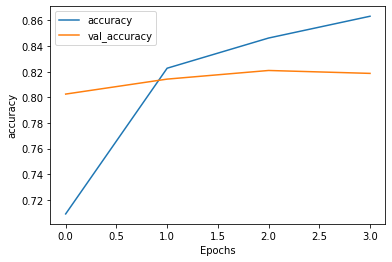

In [18]:
plot_graphs(history, 'accuracy')

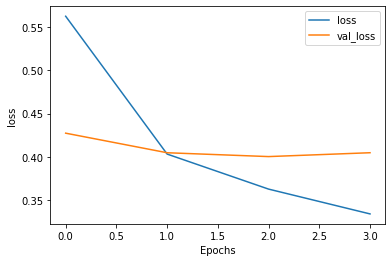

In [19]:
plot_graphs(history, 'loss')

In [ ]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'

test_input_data = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_label_data = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'))

In [ ]:
def test_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((test_input_data, test_label_data))
    dataset = dataset.batch(16)
    dataset = dataset.map(mapping_fn)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

In [ ]:
predict = est.evaluate(test_input_fn) 